The following is from [this article](https://medium.com/better-programming/shall-we-play-a-game-a7c93963b442) in Medium

Reinforcement learning has even become a critical factor in the fine-tuning of large language models (LLMs), with a mechanism known as reinforcement learning through human feedback (RLHF) putting humans in the loop to act as the reward function itself, manually highlighting more correct responses by the model as part of the improvement process.

Here’s the important things to remember.

- Reinforcement learning is about agents that take actions in environments to maximise rewards.
- Reinforcement learning doesn’t start with a lot of labelled data to train from like other ML methods. Instead, information is learned through exploration of the environment.
- Reinforcement learning can be used by machine learning algorithms to become great at games like Chess and Go, as well as solve real world problems like controlling autonomous vehicles or managing supply chain replenishment.

# The N-Armed Bandit Problem

The ‘N-armed bandit’ problem (so-called because old school slot machines had an arm-like lever you could pull and they were bandits because they took all your money) is actually a classic problem in the world of reinforcement learning.

It’s essentially a bunch of slot machines with variable payouts and an agent that has no visibility of those payouts at the beginning of the process. The aim is to maximise payouts over a series of iterations, and this is exactly the problem we’re going to set up via our Python environment.

In order to work on our n-armed bandit problem we’re going to need some bandits (slots machines). In reinforcement learning terms, what we’re doing here is defining our environment. So let’s set up some ‘bandits’ and define their values randomly within a certain range (but we won’t tell our agent about the range, so they’ll be “going in blind”).

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(111)

In [3]:
num_bandits = 5
t = 2000

In [4]:
q_true = np.random.normal(0, 1, num_bandits)

In [5]:
def get_reward(mean):
    return np.random.normal(mean, 1)

We’ve created 5 bandits, and a ‘t’ of 2000 (essentially we’re going to have 2000 turns at our slot machines to try and maximise the average payout over time).

We’ve also set up a `q_true` array which ensures a random payout or reward for each machine within some boundary. Finally, our `get_reward` function provides the reward for each ‘go’ at a machine, introducing a slight amount of variation for the reward, to make our process more interesting. Let’s plot out the true mean reward for each of our 5 slot machines:

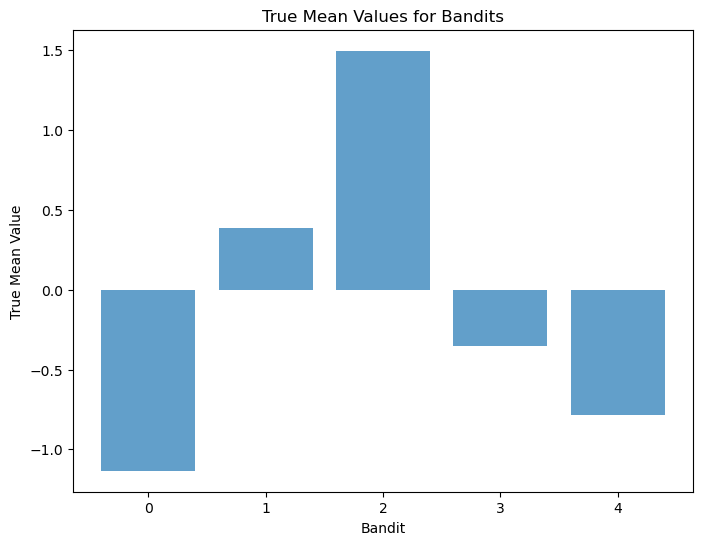

In [6]:
plt.figure(figsize=(8, 6))
plt.bar(range(num_bandits), q_true, align="center", alpha=0.7)
plt.xlabel("Bandit")
plt.ylabel("True Mean Value")
plt.title("True Mean Values for Bandits")
plt.xticks(range(num_bandits))
plt.show()

So we can see some of our bandits actually pay out negative rewards, while #2 can pay out a mean of 1.0. Okay, so to recap we’ve set up our environment, our reward and our reward function for accessing the reward. We’ve also set up our time steps (t = 2000), so we’re nearly ready to go.

# 1. Random Selection

Now it’s time to take some actions! First up, to highlight the difference between using basic reinforcement versus a completely random appraoch, let’s define a function for simply playing bandits at random. This will be our baseline to see how our reinforcement learning methods stack up.

In [7]:
# Use an entirely random selection process as a baseline
def random_selection():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # pick an action randomly
        picked = np.random.choice(num_bandits)
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        # update average reward for that action
        # this is greedy mechanism which will be used in the next section
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

Above, we’ve essentially created that random method. At each time step or ‘t’, the method will choose a bandit at random, obtain the reward, update the average and go around again!

In [8]:
random_rewards = random_selection()

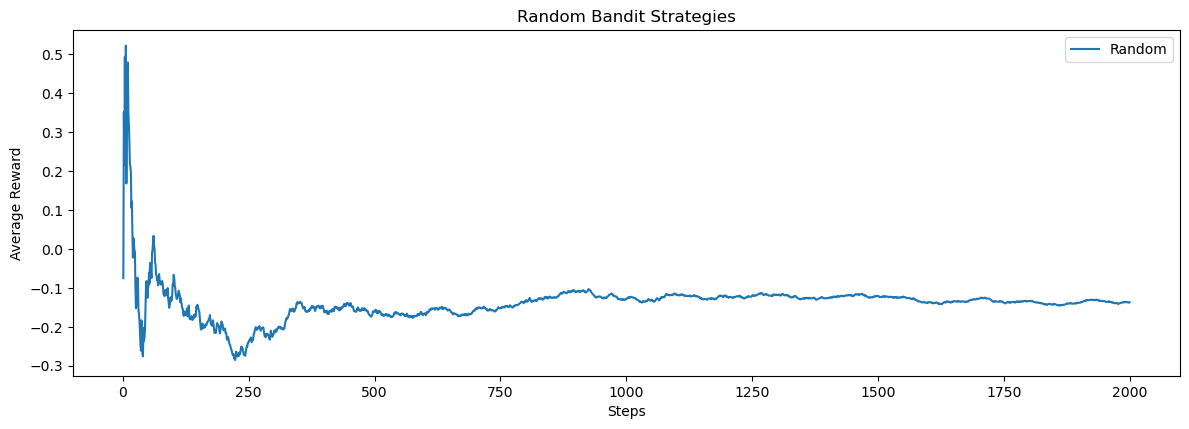

In [9]:
plt.figure(figsize=(12, 8))

# Plot the reward curves
plt.subplot(2, 1, 1)
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), label="Random")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Random Bandit Strategies")
plt.legend()

plt.tight_layout()
plt.show()

Okay, so our completely random process didn’t really seem to get a great score over 2000 turns, with an average reward that’s just barely more than 0. What about if we re-run the experiment but this time put it up against a simple reinforcement process known as ‘greedy’ selection.

# 2. Greedy method

Greedy selection is a mathematical process by which our agent will over time consistently choose the bandit that has the highest payout the most number of times. Each turn, the agent will retain a ‘memory’ of the bandit with the highest known reward the most number of times at that step, and get more and more ‘stuck’ to the highest paying bandit that it’s aware of, the idea being that this will maximise the rewards over time, beating out our ‘let’s pull everything randomly’ mechanism.

It’s basically an all-out ‘exploitation’ strategy. Exploit the known environment for maximum payout. It’s important to remember that fact, as we’ll explain in a little while why this might not be the best overall strategy.

For the equation lovers out there, the heart of our greedy method will use the following:

Q(a) ← Q(a) + (R−Q(a))/N(a)

- Q(a) is the estimated value of action a.
- N(a) represents the number of times action a has been chosen.
- R is the reward received after our action.

It’s a basic mechanism for learning from the previous turns in addition to the money you make each turn, to form better and better estimates of future rewards to aid in the selection. Here’s our code:

In [10]:
# define a greedy process
def greedy():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # pick an action greedily
        picked = np.argmax(q_t)
        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        # update average reward for that action
        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

The line `picked = np.argmax(q_t)`is where the method will attempt to select what it estimates to be the bandit that will pay out the highest each turn. Let’s put all this together, generate a new set of bandits, and compare our methods!

In [11]:
greedy_rewards = greedy()

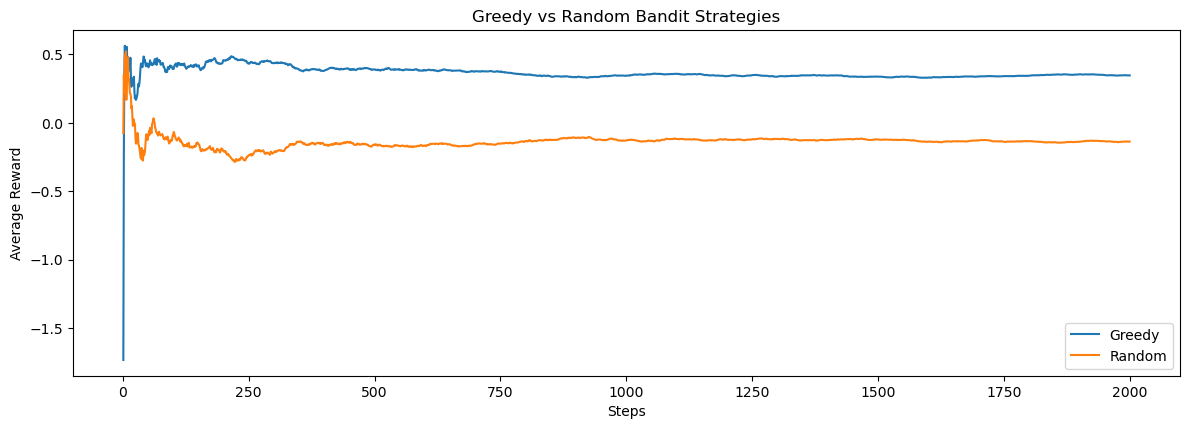

In [12]:
plt.figure(figsize=(12, 8))

# Plot the reward curves
plt.subplot(2, 1, 1)
plt.plot(list(greedy_rewards.keys()), list(greedy_rewards.values()), label="Greedy")
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), label="Random")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Greedy vs Random Bandit Strategies")
plt.legend()

plt.tight_layout()
plt.show()

The results are in, and it looks like the greedy method is gaining a far better average reward than random selection. Random selection is giving us practically no average reward after some initial randomness, whereas the greedy mechanism has averaged a much higher payout because it’s been able to converge on the highest average paying bandit:

Now this is good progress, but there’s a flaw in our greedy only approach. You see, the way the algorithm currently works, once it finds a high paying bandit, it’s very likely to converge on it and stick to it like glue. This means that while it’ll outperform random selection, it won’t balance the usefulness of exploration (seeking out the chance at an even higher payout) versus exploitation (maximising payout from what it already knows about the environment).

It’s easy to highlight this. Check out our re-run of the experiment, this time we’ve increased the number of bandits to 8:

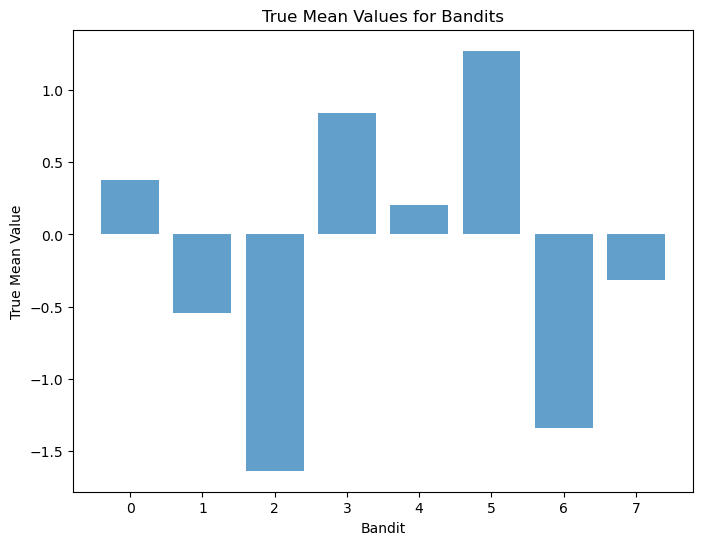

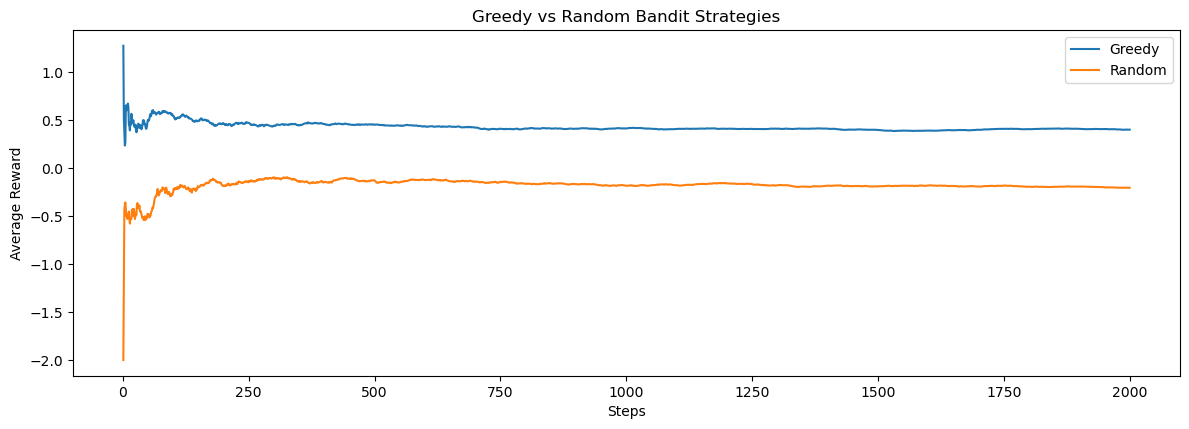

In [13]:
num_bandits = 8
t = 2000

q_true = np.random.normal(0, 1, num_bandits)

plt.figure(figsize=(8, 6))
plt.bar(range(num_bandits), q_true, align="center", alpha=0.7)
plt.xlabel("Bandit")
plt.ylabel("True Mean Value")
plt.title("True Mean Values for Bandits")
plt.xticks(range(num_bandits))
plt.show()

greedy_rewards = greedy()
random_rewards = random_selection()

plt.figure(figsize=(12, 8))

# Plot the reward curves
plt.subplot(2, 1, 1)
plt.plot(list(greedy_rewards.keys()), list(greedy_rewards.values()), label="Greedy")
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), label="Random")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Greedy vs Random Bandit Strategies")
plt.legend()

plt.tight_layout()
plt.show()

Our greedy method still outperforms randomness, but it seems to have settled on an average payout of about 0.6, even though we know that some of our bandits can pay out 1.5 or higher per turn. So how can we improve our reinforcement learning? By introducing a little more chance that the agent will sometimes choose to explore its environment instead of always exploiting! Do do that, we’ll introduce a third method — a greedy epsilon driven agent.

# 3. Greedy Epsilon

All this really means, is we’ll introduce a third method that uses a small positive number — our epsilon value — to determine whether the agent exploits its currently known environment for the maximum reward, or chooses to explore the environment for a potentially better or new maximum reward!

Let’s create a new method to encapsulate this change:

In [14]:
def epsilon_greedy():
    arm_count = {i: 0 for i in range(num_bandits)}
    q_t = [0] * num_bandits
    step_vs_reward = {}
    average_reward = 0

    for step in range(1, t + 1):
        # Choose a random action with probability epsilon
        if np.random.rand() < epsilon:
            picked = np.random.choice(num_bandits)
        else:
            picked = np.argmax(q_t)

        arm_count[picked] += 1
        reward = get_reward(q_true[picked])
        average_reward += reward

        q_t[picked] = q_t[picked] + (reward - q_t[picked]) / arm_count[picked]
        step_vs_reward[step] = average_reward / step

    return step_vs_reward

Let’s also add an epsilon value where we’ve defined our bandits and turns:

In [15]:
num_bandits = 10
t = 2000
epsilon = 0.1 # Lower value is less exploration, higher value is more exploration

Our epsilon is a value between 0 and 1 and our epsilon_greedy function will each turn generate a random number between 0 and 1, and compare it to our epsilon. If the epsilon is higher, we’ll pick a random bandit (explore) rather than go with our greedy method. If lower, we’ll just maximise rewards with what we already know. Let’s run the whole lot again, with all 3 strategies run against each other:

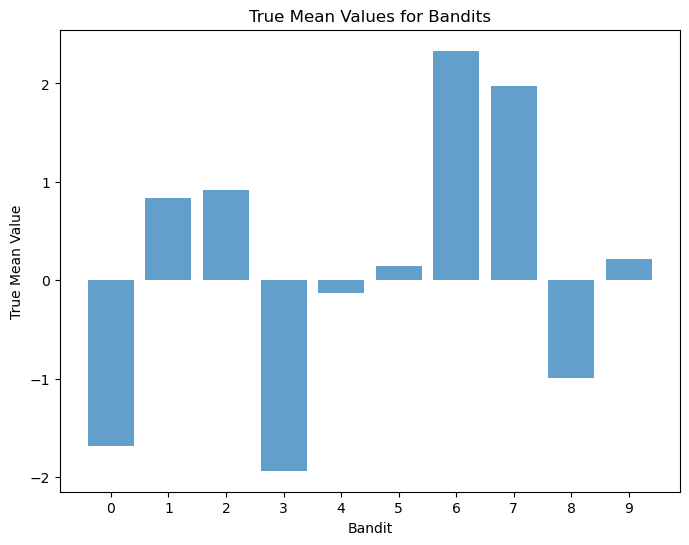

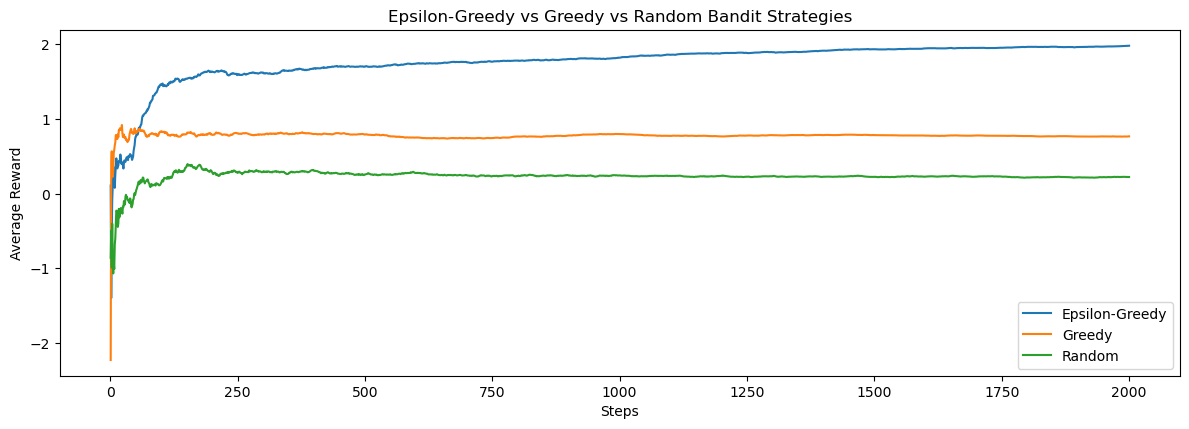

In [16]:
q_true = np.random.normal(0, 1, num_bandits)

plt.figure(figsize=(8, 6))
plt.bar(range(num_bandits), q_true, align="center", alpha=0.7)
plt.xlabel("Bandit")
plt.ylabel("True Mean Value")
plt.title("True Mean Values for Bandits")
plt.xticks(range(num_bandits))
plt.show()

epsilon_rewards = epsilon_greedy()
greedy_rewards = greedy()
random_rewards = random_selection()

plt.figure(figsize=(12, 8))

# Plot the reward curves
plt.subplot(2, 1, 1)
plt.plot(list(epsilon_rewards.keys()), list(epsilon_rewards.values()), label="Epsilon-Greedy")
plt.plot(list(greedy_rewards.keys()), list(greedy_rewards.values()), label="Greedy")
plt.plot(list(random_rewards.keys()), list(random_rewards.values()), label="Random")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy vs Greedy vs Random Bandit Strategies")
plt.legend()

plt.tight_layout()
plt.show()

Now things have gotten super interesting! Our random method is still the worst performing of the lot, but early on we can see that our greedy method was leading the way! However, at around the 200 step mark, it looks like our choice to sometimes explore the environment has actually paid off. Over the long run, our epsilon greedy method has come out ahead and produced a higher average reward.

Interestingly, if you repeat the experiment over and over, there are times that greedy will beat out greedy epsilon, owing to the inherent risk / randomness in choosing exploration at times. Altering the number of bandits to be less also seems to favour the greedy method, as it’s quicker / easier to converge on the highest paying bandit.

Try repeating the experiment with only 3 bandits and see what happens! Or try increasing the epsilon value to encourage your agent to do more exploration.